# DATA SCRAPING PROJECT

- collection of housing data in Heilbronn using rest API of https://www.immonet.de/


## THEORETICAL INTRODUCTION AND OVERVIEW

with python, you have multiple choices to collect data from the web:

- Requests library (and others) https://pypi.org/project/requests/ in order to interact with rest API
- Beautiful Soup https://www.crummy.com/software/BeautifulSoup/bs4/doc/ when you need to perform web scraping by parsing HTML and XML pages

These powerful tools allow to interact with web resources using scripts, but they need practice and expertise to be mastered. Apart from knowing the basic requests (PUT, POST, GET, DELETE), you will need to know about authentication techniques, agents, headers parsing and more to extract formatted data.

As a reference, I suggest you to visit https://github.com/balzer82/immoscraper (distributed under public license) to observe a notebook conceived for this scope, but unfortunately it is not working at the moment. Nevertheless, you can find plenty of resources looking for these topics.

In this example, we will use some free tools in order to achieve the same results. The most used in the market are:

- https://www.octoparse.com/
- https://www.parsehub.com/

As you can see from their websites, after having signed up and downloaded the application, you are able to set up a project with ordered steps to scrap data and details from generic webpages.

- https://help.parsehub.com/hc/en-us/categories/202638628-Using-ParseHub
- http://www.dataextraction.io/ for Octoparse

then you are able to download the results in csv or json format and start the analysis!

## EXERCISE - IMMONET.DE DATA SCRAPING, SUMMARY STATISTICS AND LINEAR REGRESSION

In [ ]:
!pip install pycaret[full]

     |████████████████████████████████| 301 kB 14.4 MB/s 
     |████████████████████████████████| 261 kB 59.0 MB/s 
     |████████████████████████████████| 1.3 MB 36.2 MB/s 
     |████████████████████████████████| 167 kB 65.1 MB/s 
     |████████████████████████████████| 86 kB 7.5 MB/s 
     |████████████████████████████████| 16.5 MB 46.0 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 43.3 MB/s 
     |████████████████████████████████| 1.7 MB 49.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 114 kB 63.3 MB/s 
     |████████████████████████████████| 6.8 MB 59.4 MB/s 
     |████████████████████████████████| 659 kB 60.0 MB/s 
     |████████████████████████████████| 11.8 MB 55.3 MB/s 
     |████████████████████████████████| 73 kB 2.7 MB/s 
     |█████████████████

In [ ]:
#!pip uninstall lightgbm -y
#!pip install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

In [ ]:
from google.colab import files  #For uploading files
import io #for reading the files
#upload_h_df=files.upload()

In [ ]:
import pandas as pd

df1 = pd.read_csv('heilbronn_houses.csv')
df2 = pd.read_csv('run_results copy.csv')
df3 = pd.read_csv('run_results.csv')
df4 = pd.read_csv('run_results copy 2.csv')
df5 = pd.read_csv('run_results_new.csv')

In [ ]:
h_df = pd.concat([df1, df2, df3, df4, df5]) #was getting error

In [ ]:
h_df

house_name  \
0    Schnuckelige Doppelhaushälfte mit Renovierungs...   
1    Heilbronner Doppelhaushälfte im Dornröschensch...   
2    Wohnschatz mit viel Platz! - FALC Immobilien H...   
3     Neuwertiges Einfamilienhaus mit Einliegerwohnung   
4    Heilbronn Mittelhaus ruhige Lage und sofort frei!   
..                                                 ...   
187  Gepflegtes Einfamilienhaus mit vielen Möglichk...   
188  Doppelhaushälfte mit großem Gartengrundstück i...   
189  Wohn- und Geschäftshaus sowie 2 Familienhaus i...   
190  Wohn- und Geschäftshaus sowie 2 Familienhaus i...   
191  2-3 Familienhaus in Randlage von Bretzfeld - B...   

                                   house_url house_price  house_rooms  \
0    https://www.immonet.de/angebot/43479823   199.000 €          4.0   
1    https://www.immonet.de/angebot/44629104   229.500 €          3.0   
2    https://www.immonet.de/angebot/44602603   480.000 €          9.0   
3    https://www.immonet.de/angebot/44661623   570.000 €          5.0   
4    https://www.immonet.de/angebot/44527734   578.000 €          5.0   
..                                       ...         ...          ...   
187  https://www.immonet.de/angebot/46086883         NaN          5.5   
188  https://www.immonet.de/angebot/45845408   650.000 €          4.0   
189  https://www.immonet.de/angebot/45343627         NaN         28.0   
190  https://www.immonet.de/angebot/45467605         NaN         28.0   
191  https://www.immonet.de/angebot/46315281   665.000 €          8.0   

    house_living_area house_tot_area  \
0              100 m²          90 m²   
1               64 m²         169 m²   
2              168 m²         177 m²   
3              140 m²         124 m²   
4              142 m²         138 m²   
..                ...            ...   
187            150 m²         709 m²   
188            114 m²         849 m²   
189            643 m²       1,863 m²   
190            643 m²       1,863 m²   
191            240 m²         747 m²   

                                         house_address  \
0                  74078 Heilbronn\nAuf Karte anzeigen   
1    Bauleuteweg 8\n74076 Heilbronn\nAuf Karte anze...   
2                  74080 Heilbronn\nAuf Karte anzeigen   
3                  74078 Heilbronn\nAuf Karte anzeigen   
4                  74081 Heilbronn\nAuf Karte anzeigen   
..                                                 ...   
187              74855 Haßmersheim\nAuf Karte anzeigen   
188              71642 Ludwigsburg\nAuf Karte anzeigen   
189              71642 Ludwigsburg\nAuf Karte anzeigen   
190              71642 Ludwigsburg\nAuf Karte anzeigen   
191                                                NaN   

     house_construction_year   house_heating house_energy_sources  \
0                     1890.0  Zentralheizung                   Öl   
1                     1947.0             NaN                   Öl   
2                     1906.0  Zentralheizung                  Gas   
3                     1896.0  Zentralheizung                  NaN   
4                     2000.0  Zentralheizung                  Gas   
..                       ...             ...                  ...   
187                   1979.0  Zentralheizung                   Öl   
188                   1900.0  Zentralheizung                  Gas   
189                   1973.0  Zentralheizung              Gas, Öl   
190                   1926.0  Zentralheizung              Gas, Öl   
191                      NaN             NaN                  NaN   

    house_energy_class  
0                  NaN  
1                  NaN  
2             Klasse F  
3             Klasse F  
4             Klasse A  
..                 ...  
187           Klasse C  
188           Klasse G  
189           Klasse G  
190           Klasse G  
191                NaN  

[960 rows x 11 columns]

### CLEAN AND PREPARE THE DATAFRAME

In [ ]:
# clean df by removing duplicates and unnecessary columns
h_df.drop_duplicates(inplace=True)
h_df.drop(columns=['house_url'], inplace=True)

In [ ]:
# reindex the df
h_df.reset_index(inplace=True)
h_df.drop(columns=['index'], inplace=True)

In [ ]:
# transform prices into float
h_df['house_price'] = h_df['house_price'].str.replace(r'\D', '').astype(float)  # remove unnecessary characters as €
h_df = h_df[h_df['house_price'].notna()]

# transform m2 into float
h_df['house_living_area'] = h_df['house_living_area'].str.replace(r'\D', '').astype(float)  # remove unnecessary characters
h_df['house_tot_area'] = h_df['house_tot_area'].str.replace(r'\D', '').astype(float)

# keep only post code
h_df['house_address'] = h_df['house_address'].str.replace(r'\D', '')  # remove unnecessary characters
h_df['house_address'] = h_df['house_address'].str[-5:]  # remove house numbers
h_df['house_address'] = h_df['house_address'].str[:3]  # keep only first 3 numbers of the postcode

# year to date and remove observations with missing construction year and < 1800
h_df['house_construction_year'] = h_df[h_df['house_construction_year'] >= 1800]['house_construction_year']  # avoid too low years
h_df = h_df[h_df['house_construction_year'].notna()]
#h_df['house_construction_year'] = pd.to_datetime(h_df['house_construction_year'], format='%Y')
#h_df['house_construction_year'] = h_df['house_construction_year'].dt.year  # keep years only
#h_df.dropna(inplace=True)  # drop missing values

# keep only energy class letter
h_df['house_energy_class'] = h_df['house_energy_class'].str.replace('+', '').replace(' ','')  # remove spaces and plus
h_df['house_energy_class'] = h_df['house_energy_class'].str[-1:]  # remove the word 'class'

# reindex the df
h_df.reset_index(inplace=True)
h_df.drop(columns=['index'], inplace=True)

# see df
h_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


house_name  house_price  \
0  Schnuckelige Doppelhaushälfte mit Renovierungs...     199000.0   
1  Heilbronner Doppelhaushälfte im Dornröschensch...     229500.0   
2  Wohnschatz mit viel Platz! - FALC Immobilien H...     480000.0   
3   Neuwertiges Einfamilienhaus mit Einliegerwohnung     570000.0   
4  Heilbronn Mittelhaus ruhige Lage und sofort frei!     578000.0   

   house_rooms  house_living_area  house_tot_area house_address  \
0          4.0              100.0            90.0           740   
1          3.0               64.0           169.0           740   
2          9.0              168.0           177.0           740   
3          5.0              140.0           124.0           740   
4          5.0              142.0           138.0           740   

   house_construction_year   house_heating house_energy_sources  \
0                   1890.0  Zentralheizung                   Öl   
1                   1947.0             NaN                   Öl   
2                   1906.0  Zentralheizung                  Gas   
3                   1896.0  Zentralheizung                  NaN   
4                   2000.0  Zentralheizung                  Gas   

  house_energy_class  
0                NaN  
1                NaN  
2                  F  
3                  F  
4                  A

### transform qualitative data into quantitative

In [ ]:
# see unique values of qualitative columns
print(h_df.house_heating.unique())  # good for one-hot encoding
print(h_df.house_energy_sources.unique())  # drop because too many unique values
print(h_df.house_energy_class.unique())  # good for ordinal encoding


['Zentralheizung' nan 'Etagenheizung' 'Ofenheizung']
['Öl' 'Gas' nan 'Gas, Solar' 'Fernwärme' 'Strom' 'Öl, Solar'
 'Luft-/Wasserwärme' 'Gas, Holz' 'Pellets' 'Holz' 'Solar, Strom'
 'Pellets, Holz, Solar, Strom' 'Flüssiggas, Gas' 'Holz, Öl' 'Öl, Strom'
 'Fernwärme, Gas' 'Holz, Kohle, Öl' 'Holz, Kohle' 'Luft-/Wasserwärme, Gas'
 'Flüssiggas' 'Luft-/Wasserwärme, Strom' 'Gas, Öl' 'Flüssiggas, Öl'
 'Pellets, Öl' 'Erdwärme' 'Solar']
[nan 'F' 'A' 'C' 'E' 'H' 'D' 'G' 'B']


In [ ]:
import numpy as np
# transform heating, energy_sources and energy_class (qualitative variable)
# into quantitative variable using an ordinal encoder

# Using pandas factorize method for ordinal data (from more to less polluting)
categories_class = pd.Categorical(h_df['house_energy_class'], categories=['H','G','F','E','D','C','B','A'], ordered=True)
# Order of labels set for data
print(categories_class)

# Factorizing the column data
labels, unique = pd.factorize(categories_class, sort=True)
h_df['house_energy_class'] = labels

# Using pandas get_dummies to one-hot encoding the column house_address
h_df = h_df[h_df['house_address'].notna()]  # remove NaN values for encoding
h_df = pd.get_dummies(data=h_df, columns=['house_address'])

# Using pandas get_dummies to one-hot encoding the column house_heating
h_df = h_df[h_df['house_heating'].notna()]  # remove NaN values for encoding
h_df = pd.get_dummies(data=h_df, columns=['house_heating'])

# drop house_energy_sources column
h_df.drop(columns=['house_energy_sources'], inplace=True)

# replace labels of NaN with missing values
h_df['house_energy_class'] = h_df['house_energy_class'].replace(-1, np.NaN)

# see encoded df
h_df.head()


[NaN, NaN, 'F', 'F', 'A', ..., NaN, NaN, NaN, 'E', 'G']
Length: 508
Categories (8, object): ['H' < 'G' < 'F' < 'E' < 'D' < 'C' < 'B' < 'A']


house_name  house_price  \
0  Schnuckelige Doppelhaushälfte mit Renovierungs...     199000.0   
2  Wohnschatz mit viel Platz! - FALC Immobilien H...     480000.0   
3   Neuwertiges Einfamilienhaus mit Einliegerwohnung     570000.0   
4  Heilbronn Mittelhaus ruhige Lage und sofort frei!     578000.0   
5  Ihre Wohlfühl-Doppelhaushälfte mit kleinem pfl...     649000.0   

   house_rooms  house_living_area  house_tot_area  house_construction_year  \
0          4.0              100.0            90.0                   1890.0   
2          9.0              168.0           177.0                   1906.0   
3          5.0              140.0           124.0                   1896.0   
4          5.0              142.0           138.0                   2000.0   
5          6.0              142.0           146.0                   2002.0   

   house_energy_class  house_address_715  house_address_716  \
0                 NaN                  0                  0   
2                 2.0                  0                  0   
3                 2.0                  0                  0   
4                 7.0                  0                  0   
5                 5.0                  0                  0   

   house_address_717  ...  house_address_741  house_address_742  \
0                  0  ...                  0                  0   
2                  0  ...                  0                  0   
3                  0  ...                  0                  0   
4                  0  ...                  0                  0   
5                  0  ...                  0                  0   

   house_address_743  house_address_746  house_address_748  house_address_749  \
0                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   
5                  0                  0                  0                  0   

   house_address_750  house_heating_Etagenheizung  house_heating_Ofenheizung  \
0                  0                            0                          0   
2                  0                            0                          0   
3                  0                            0                          0   
4                  0                            0                          0   
5                  0                            0                          0   

   house_heating_Zentralheizung  
0                             1  
2                             1  
3                             1  
4                             1  
5                             1  

[5 rows x 21 columns]

### fill NaN values based on column mean grouped by categorized construction years

In [ ]:
# fill NaN values based on mean in the same decade

# create bins every 20 years
conditions = [
    (h_df['house_construction_year'] >= 1800) & (h_df['house_construction_year'] < 1820),
    (h_df['house_construction_year'] >= 1820) & (h_df['house_construction_year'] < 1840),
    (h_df['house_construction_year'] >= 1840) & (h_df['house_construction_year'] < 1860),
    (h_df['house_construction_year'] >= 1860) & (h_df['house_construction_year'] < 1880),
    (h_df['house_construction_year'] >= 1880) & (h_df['house_construction_year'] < 1900),
    (h_df['house_construction_year'] >= 1900) & (h_df['house_construction_year'] < 1920),
    (h_df['house_construction_year'] >= 1920) & (h_df['house_construction_year'] < 1940),
    (h_df['house_construction_year'] >= 1940) & (h_df['house_construction_year'] < 1960),
    (h_df['house_construction_year'] >= 1960) & (h_df['house_construction_year'] < 1980),
    (h_df['house_construction_year'] >= 1980) & (h_df['house_construction_year'] < 2000),
    (h_df['house_construction_year'] >= 2000) & (h_df['house_construction_year'] < 2020),
    (h_df['house_construction_year'] >= 2020) & (h_df['house_construction_year'] < 2040),
    ]
     
values = [1800, 1820, 1840, 1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020]
     
h_df['house_summary_year'] = np.select(conditions, values)
h_df['house_summary_year'] = h_df['house_summary_year'].astype(float)

# for energy_class (we can try with modes too)
h_df['house_energy_class'] = h_df.groupby('house_summary_year').transform(lambda x: x.fillna(x.mean()))['house_energy_class']

# trasnform years columns in datetime for further analysis
h_df['house_construction_year'] = pd.to_datetime(h_df['house_construction_year'], format='%Y')
h_df['house_construction_year'] = h_df['house_construction_year'].dt.year  # keep years only
h_df['house_summary_year'] = pd.to_datetime(h_df['house_summary_year'], format='%Y')
h_df['house_summary_year'] = h_df['house_summary_year'].dt.year  # keep years only

# drop residual NaN
h_df.dropna(inplace=True)
# reindex the df
h_df.reset_index(inplace=True)
h_df.drop(columns=['index'], inplace=True)

# see df
h_df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.


house_name  house_price  \
0  Schnuckelige Doppelhaushälfte mit Renovierungs...     199000.0   
1  Wohnschatz mit viel Platz! - FALC Immobilien H...     480000.0   
2   Neuwertiges Einfamilienhaus mit Einliegerwohnung     570000.0   
3  Heilbronn Mittelhaus ruhige Lage und sofort frei!     578000.0   
4  Ihre Wohlfühl-Doppelhaushälfte mit kleinem pfl...     649000.0   

   house_rooms  house_living_area  house_tot_area  house_construction_year  \
0          4.0              100.0            90.0                     1890   
1          9.0              168.0           177.0                     1906   
2          5.0              140.0           124.0                     1896   
3          5.0              142.0           138.0                     2000   
4          6.0              142.0           146.0                     2002   

   house_energy_class  house_address_715  house_address_716  \
0            1.142857                  0                  0   
1            2.000000                  0                  0   
2            2.000000                  0                  0   
3            7.000000                  0                  0   
4            5.000000                  0                  0   

   house_address_717  ...  house_address_742  house_address_743  \
0                  0  ...                  0                  0   
1                  0  ...                  0                  0   
2                  0  ...                  0                  0   
3                  0  ...                  0                  0   
4                  0  ...                  0                  0   

   house_address_746  house_address_748  house_address_749  house_address_750  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   house_heating_Etagenheizung  house_heating_Ofenheizung  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   house_heating_Zentralheizung  house_summary_year  
0                             1                1880  
1                             1                1900  
2                             1                1880  
3                             1                2000  
4                             1                2000  

[5 rows x 22 columns]

In [ ]:
h_df.count()

house_name                      301
house_price                     301
house_rooms                     301
house_living_area               301
house_tot_area                  301
house_construction_year         301
house_energy_class              301
house_address_715               301
house_address_716               301
house_address_717               301
house_address_740               301
house_address_741               301
house_address_742               301
house_address_743               301
house_address_746               301
house_address_748               301
house_address_749               301
house_address_750               301
house_heating_Etagenheizung     301
house_heating_Ofenheizung       301
house_heating_Zentralheizung    301
house_summary_year              301
dtype: int64

### EXPORT CLEANED DF INTO CSV

# Новый раздел

In [ ]:
# export df as csv in the current working directory
h_df.to_csv('heilbronn_houses_cleaned_final.csv', index=False)


### SUMMARY STATISTICS

In [ ]:
# summary statistics (per summary years)
h_df.groupby('house_summary_year').describe()


house_price                                          \
                         count           mean            std       min   
house_summary_year                                                       
1840                       3.0  483000.000000   81406.387956  389000.0   
1860                       5.0  575600.000000  378908.036336  269000.0   
1880                      11.0  513363.636364  265126.865001  199000.0   
1900                      33.0  655969.696970  580517.790686  229000.0   
1920                      20.0  806645.000000  574545.765183  299000.0   
1940                      32.0  779249.968750  508872.452759  220000.0   
1960                     113.0  826202.646018  413189.640195  348000.0   
1980                      50.0  879680.000000  336738.767520  335000.0   
2000                      27.0  890370.370370  331964.189235  395000.0   
2020                       7.0  948300.000000  256022.401364  592000.0   

                                                              house_rooms  \
                         25%        50%        75%        max       count   
house_summary_year                                                          
1840                459500.0   530000.0   530000.0   530000.0         3.0   
1860                299000.0   550000.0   550000.0  1210000.0         5.0   
1880                438000.0   450000.0   520000.0  1250000.0        11.0   
1900                315000.0   449000.0   650000.0  2800000.0        33.0   
1920                526225.0   732500.0   815000.0  3100000.0        20.0   
1940                487500.0   670000.0   820000.0  2599000.0        32.0   
1960                589000.0   750000.0   890000.0  3100000.0       113.0   
1980                655500.0   752000.0  1108000.0  1890000.0        50.0   
2000                644500.0   765000.0  1170000.0  1572000.0        27.0   
2020                727000.0  1093200.0  1154650.0  1189600.0         7.0   

                              ... house_heating_Ofenheizung       \
                        mean  ...                       75%  max   
house_summary_year            ...                                  
1840                5.333333  ...                       0.0  0.0   
1860                6.200000  ...                       0.0  1.0   
1880                6.500000  ...                       0.0  1.0   
1900                8.636364  ...                       0.0  1.0   
1920                8.400000  ...                       0.0  0.0   
1940                8.015625  ...                       0.0  1.0   
1960                7.889381  ...                       0.0  1.0   
1980                7.440000  ...                       0.0  0.0   
2000                6.185185  ...                       0.0  0.0   
2020                5.500000  ...                       0.0  0.0   

                   house_heating_Zentralheizung                                \
                                          count      mean       std  min  25%   
house_summary_year                                                              
1840                                        3.0  0.666667  0.577350  0.0  0.5   
1860                                        5.0  0.400000  0.547723  0.0  0.0   
1880                                       11.0  0.909091  0.301511  0.0  1.0   
1900                                       33.0  0.757576  0.435194  0.0  1.0   
1920                                       20.0  0.950000  0.223607  0.0  1.0   
1940                                       32.0  0.875000  0.336011  0.0  1.0   
1960                                      113.0  0.964602  0.185607  0.0  1.0   
1980                                       50.0  0.900000  0.303046  0.0  1.0   
2000                                       27.0  1.000000  0.000000  1.0  1.0   
2020                                        7.0  1.000000  0.000000  1.0  1.0   

                                   
                    50%  75%  max  
house_summary_year                 
1840   

In [ ]:
# Avg price per year
h_df.groupby(['house_summary_year']).std()

house_price  house_rooms  house_living_area  \
house_summary_year                                                  
1840                 81406.387956     2.309401          17.320508   
1860                378908.036336     6.260990         185.956984   
1880                265126.865001     3.057777         106.873162   
1900                580517.790686     5.911156         138.303362   
1920                574545.765183     5.420720         130.618569   
1940                508872.452759     4.796646         133.382771   
1960                413189.640195     3.194397          87.300032   
1980                336738.767520     2.127660          83.536808   
2000                331964.189235     1.635826         105.668824   
2020                256022.401364     1.384437          36.228113   

                    house_tot_area  house_construction_year  \
house_summary_year                                            
1840                     10.969655                 0.000000   
1860                    119.669545                 6.188699   
1880                    562.638928                 6.744695   
1900                    324.976742                 5.706854   
1920                    384.046636                 5.112163   
1940                    337.142236                 4.674916   
1960                    314.310015                 5.570276   
1980                    342.752323                 5.346332   
2000                    503.147158                 4.859859   
2020                    161.971926                 0.577350   

                    house_energy_class  house_address_715  house_address_716  \
house_summary_year                                                             
1840                          1.732051           0.000000           0.000000   
1860                          0.433013           0.000000           0.000000   
1880                          0.828079           0.000000           0.000000   
1900                          0.951288           0.174078           0.331434   
1920                          1.551133           0.000000           0.366348   
1940                          1.674946           0.000000           0.245935   
1960                          1.590040           0.132443           0.330928   
1980                          1.168251           0.000000           0.197949   
2000                          1.341668           0.000000           0.266880   
2020                          0.000000           0.000000           0.000000   

                    house_address_717  house_address_740  house_address_741  \
house_summary_year                                                            
1840                         0.000000           0.000000           0.000000   
1860                         0.000000           0.547723           0.000000   
1880                         0.000000           0.522233           0.000000   
1900                         0.000000           0.452267           0.242306   
1920                         0.223607           0.410391           0.444262   
1940                         0.000000           0.439941           0.396558   
1960                         0.297748           0.297748           0.397726   
1980                         0.303046           0.239898           0.350510   
2000                         0.362014           0.320256           0.320256   
2020                         0.000000           0.000000           0.000000   

                    house_address_742  house_address_743  house_address_746  \
house_summary_year                                                            
1840                         0.000000           0.000000            0.00000   
1860                         0.000000           0.547723            0.00000   
1880                         0.000000           0.467099            0.40452   
1900                         0.415149           0.391675            0.00000   
1920                         0.223607           0.47

In [ ]:
# Avg price per m2 ('living area')
h_df['house_price_m2'] = h_df['house_price']/h_df['house_living_area']

print('the avg price per square meter for all the houses is: ' + str(h_df['house_price_m2'].mean()))
h_df.groupby('house_summary_year').mean()


the avg price per square meter for all the houses is: 4005.3750534605324


house_price  house_rooms  house_living_area  \
house_summary_year                                                  
1840                483000.000000     5.333333         125.000000   
1860                575600.000000     6.200000         219.000000   
1880                513363.636364     6.500000         188.454545   
1900                655969.696970     8.636364         196.484848   
1920                806645.000000     8.400000         203.500000   
1940                779249.968750     8.015625         202.937500   
1960                826202.646018     7.889381         209.185841   
1980                879680.000000     7.440000         223.360000   
2000                890370.370370     6.185185         203.148148   
2020                948300.000000     5.500000         166.142857   

                    house_tot_area  house_construction_year  \
house_summary_year                                            
1840                    238.333333              1850.000000   
1860                    167.400000              1872.600000   
1880                    452.818182              1892.909091   
1900                    404.484848              1906.454545   
1920                    432.350000              1929.150000   
1940                    509.125000              1952.625000   
1960                    659.017699              1968.840708   
1980                    558.780000              1989.220000   
2000                    418.703704              2006.814815   
2020                    628.285714              2022.000000   

                    house_energy_class  house_address_715  house_address_716  \
house_summary_year                                                             
1840                          2.000000           0.000000           0.000000   
1860                          1.250000           0.000000           0.000000   
1880                          1.142857           0.000000           0.000000   
1900                          0.958333           0.030303           0.121212   
1920                          2.142857           0.000000           0.150000   
1940                          2.031250           0.000000           0.062500   
1960                          2.381406           0.017699           0.123894   
1980                          3.353846           0.000000           0.040000   
2000                          5.395062           0.000000           0.074074   
2020                          7.000000           0.000000           0.000000   

                    house_address_717  house_address_740  ...  \
house_summary_year                                        ...   
1840                         0.000000           0.000000  ...   
1860                         0.000000           0.400000  ...   
1880                         0.000000           0.545455  ...   
1900                         0.000000           0.272727  ...   
1920                         0.050000           0.200000  ...   
1940                         0.000000           0.250000  ...   
1960                         0.097345           0.097345  ...   
1980                         0.100000           0.060000  ...   
2000                         0.148148           0.111111  ...   
2020                         0.000000           0.000000  ...   

                    house_address_742  house_address_743  house_address_746  \
house_summary_year                                                            
1840                         0.000000           1.000000           0.000000   
1860                         0.000000           0.600000           0.000000   
1880                         0.000000           0.272727           0.181818   
1900                         0.212121           0.181818           0.000000   
1920                         0.050000           0.300000           0.000000   
1940                         0.000000           0.312500           0.000000   
1960                         0.150442           0.212389      

In [ ]:
h_df.head()

house_name  house_price  \
0  Schnuckelige Doppelhaushälfte mit Renovierungs...     199000.0   
1  Wohnschatz mit viel Platz! - FALC Immobilien H...     480000.0   
2   Neuwertiges Einfamilienhaus mit Einliegerwohnung     570000.0   
3  Heilbronn Mittelhaus ruhige Lage und sofort frei!     578000.0   
4  Ihre Wohlfühl-Doppelhaushälfte mit kleinem pfl...     649000.0   

   house_rooms  house_living_area  house_tot_area  house_construction_year  \
0          4.0              100.0            90.0                     1890   
1          9.0              168.0           177.0                     1906   
2          5.0              140.0           124.0                     1896   
3          5.0              142.0           138.0                     2000   
4          6.0              142.0           146.0                     2002   

   house_energy_class  house_address_715  house_address_716  \
0            1.142857                  0                  0   
1            2.000000                  0                  0   
2            2.000000                  0                  0   
3            7.000000                  0                  0   
4            5.000000                  0                  0   

   house_address_717  ...  house_address_743  house_address_746  \
0                  0  ...                  0                  0   
1                  0  ...                  0                  0   
2                  0  ...                  0                  0   
3                  0  ...                  0                  0   
4                  0  ...                  0                  0   

   house_address_748  house_address_749  house_address_750  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

   house_heating_Etagenheizung  house_heating_Ofenheizung  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   house_heating_Zentralheizung  house_summary_year  house_price_m2  
0                             1                1880     1990.000000  
1                             1                1900     2857.142857  
2                             1                1880     4071.428571  
3                             1                2000     4070.422535  
4                             1                2000     4570.422535  

[5 rows x 23 columns]

In [ ]:
# Importing the dataset
y = h_df['house_price']
X = h_df.drop(columns=['house_name','house_price'])

y_arr = y.to_numpy()
X_arr = X.to_numpy()

# Splitting the dataset into the Training set and Test set
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 1/3, random_state = 0)
#split 1/2 test and pseudo-random generator state 0 

# Feature Scaling not needed
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Simple Linear Regression to the Training set
# from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # Create object of LinearRegression class
regressor.fit(X_train, y_train) #fit method of class: fits regressor to training data

# Predicting the Test set results
y_pred = regressor.predict(X_test) 
# create predictor with regressor model by using predict method

print("coefficients: ", regressor.coef_)
print("intercept: ", regressor.intercept_)

coefficients:  [ 5.26323923e+03  3.58746467e+03  3.73045955e+01 -4.79019896e+02
 -4.18304286e+03 -3.45197757e+04  5.95625911e+04 -2.01950518e+04
 -9.79727526e+03 -5.90156729e+03 -7.52319167e+03 -1.88913514e+04
  1.98080254e+04 -5.92773981e+04  9.70269586e+03  6.70322989e+04
 -7.77726309e+04  6.31694013e+04  1.46032296e+04  1.97101207e+02
  1.92415719e+02]
intercept:  -207021.47954069963


In [ ]:
# check dimensions of arrays
print("array X has shape: ", X_arr.shape)
print("array y has shape: ", y_arr.shape)
print("array X train has shape: ", X_train.shape)
print("array y train has shape: ", y_train.shape)
print("array X test has shape: ", X_test.shape)
print("array y test has shape: ", y_test.shape)
print("array y prediction has shape: ",y_pred.shape)

array X has shape:  (301, 21)
array y has shape:  (301,)
array X train has shape:  (200, 21)
array y train has shape:  (200,)
array X test has shape:  (101, 21)
array y test has shape:  (101,)
array y prediction has shape:  (101,)


In [ ]:
#evaluate r-squared and other metrics
#from sklearn.metrics import mean_squared_error, r2_score
print("r2: ", r2_score(y_test, y_pred))
print("mean squared error: ", mean_squared_error(y_test, y_pred))

r2:  0.9364630171464953
mean squared error:  11321875912.33159


In [ ]:
h_df

house_name  house_price  \
0    Schnuckelige Doppelhaushälfte mit Renovierungs...     1.99e+05   
1    Wohnschatz mit viel Platz! - FALC Immobilien H...     4.80e+05   
2     Neuwertiges Einfamilienhaus mit Einliegerwohnung     5.70e+05   
3    Heilbronn Mittelhaus ruhige Lage und sofort frei!     5.78e+05   
4    Ihre Wohlfühl-Doppelhaushälfte mit kleinem pfl...     6.49e+05   
..                                                 ...          ...   
296  NEU Viel Platz, viele Möglichkeiten, Top-Lage,...     7.48e+05   
297                familienfreundliches 3 Familienhaus     1.20e+06   
298                                 Haus zum Verlieben     7.99e+05   
299               Dreifamilienhaus mit Blick ins Grüne     1.19e+06   
300  Doppelhaushälfte mit großem Gartengrundstück i...     6.50e+05   

     house_rooms  house_living_area  house_tot_area  house_construction_year  \
0            4.0              100.0            90.0                     1890   
1            9.0              168.0           177.0                     1906   
2            5.0              140.0           124.0                     1896   
3            5.0              142.0           138.0                     2000   
4            6.0              142.0           146.0                     2002   
..           ...                ...             ...                      ...   
296         10.0              320.0          1088.0                     1972   
297         11.0              304.0           469.0                     1971   
298          7.0              206.0           924.0                     1966   
299         11.0              300.0           744.0                     1963   
300          4.0              114.0           849.0                     1900   

     house_energy_class  house_address_715  house_address_716  \
0                  1.14                  0                  0   
1                  2.00                  0                  0   
2                  2.00                  0                  0   
3                  7.00                  0                  0   
4                  5.00                  0                  0   
..                  ...                ...                ...   
296                3.00                  0                  0   
297                4.00                  0                  0   
298                2.40                  1                  0   
299                3.00                  0                  1   
300                1.00                  0                  1   

     house_address_717  ...  house_address_743  house_address_746  \
0                    0  ...                  0                  0   
1                    0  ...                  0                  0   
2                    0  ...                  0                  0   
3                    0  ...                  0                  0   
4                    0  ...                  0                  0   
..                 ...  ...                ...                ...   
296                  0  ...                  1                  0   
297                  1  ...                  0                  0   
298                  0  ...                  0                  0   
299                  0  ...                  0                  0   
300                  0  ...                  0                  0   

     house_address_748  house_address_749  house_address_750  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
..                 ...                ...                ...   
296                  0                  0                  0   
297                  0                  0                  0   
298                  0                  0   

# XgBoost


Strengths of XGBoost over Classifiers/Regressors
The interpretability of results is good, we can visualize the final trees to determine what variables split the tree and how the thresholds worked.
The interpretability of results is good, we can visualize the final trees to determine what variables split the tree and how the thresholds worked.
Speed and accuracy — XG boost is quick and accurate compared to older algorithms! 


In [ ]:
h_df

house_name  house_price  \
0    Schnuckelige Doppelhaushälfte mit Renovierungs...     1.99e+05   
1    Wohnschatz mit viel Platz! - FALC Immobilien H...     4.80e+05   
2     Neuwertiges Einfamilienhaus mit Einliegerwohnung     5.70e+05   
3    Heilbronn Mittelhaus ruhige Lage und sofort frei!     5.78e+05   
4    Ihre Wohlfühl-Doppelhaushälfte mit kleinem pfl...     6.49e+05   
..                                                 ...          ...   
296  NEU Viel Platz, viele Möglichkeiten, Top-Lage,...     7.48e+05   
297                familienfreundliches 3 Familienhaus     1.20e+06   
298                                 Haus zum Verlieben     7.99e+05   
299               Dreifamilienhaus mit Blick ins Grüne     1.19e+06   
300  Doppelhaushälfte mit großem Gartengrundstück i...     6.50e+05   

     house_rooms  house_living_area  house_tot_area  house_construction_year  \
0            4.0              100.0            90.0                     1890   
1            9.0              168.0           177.0                     1906   
2            5.0              140.0           124.0                     1896   
3            5.0              142.0           138.0                     2000   
4            6.0              142.0           146.0                     2002   
..           ...                ...             ...                      ...   
296         10.0              320.0          1088.0                     1972   
297         11.0              304.0           469.0                     1971   
298          7.0              206.0           924.0                     1966   
299         11.0              300.0           744.0                     1963   
300          4.0              114.0           849.0                     1900   

     house_energy_class  house_address_715  house_address_716  \
0                  1.14                  0                  0   
1                  2.00                  0                  0   
2                  2.00                  0                  0   
3                  7.00                  0                  0   
4                  5.00                  0                  0   
..                  ...                ...                ...   
296                3.00                  0                  0   
297                4.00                  0                  0   
298                2.40                  1                  0   
299                3.00                  0                  1   
300                1.00                  0                  1   

     house_address_717  ...  house_address_743  house_address_746  \
0                    0  ...                  0                  0   
1                    0  ...                  0                  0   
2                    0  ...                  0                  0   
3                    0  ...                  0                  0   
4                    0  ...                  0                  0   
..                 ...  ...                ...                ...   
296                  0  ...                  1                  0   
297                  1  ...                  0                  0   
298                  0  ...                  0                  0   
299                  0  ...                  0                  0   
300                  0  ...                  0                  0   

     house_address_748  house_address_749  house_address_750  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
..                 ...                ...                ...   
296                  0                  0                  0   
297                  0                  0                  0   
298                  0                  0   

In [ ]:
import xgboost as xgb 
from xgboost import XGBRegressor, plot_importance 
X, y = h_df.drop(columns=['house_name','house_price','house_price_m2'], axis = 1), h_df['house_price']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

Train r2 score:  0.998460089740836
Test r2 score:  0.7148672868121395
Train RMSE: 16570.8856
Test RMSE: 258973.6956


In [ ]:
xgb_model2 = XGBRegressor(n_estimators=1000)
xgb_model2.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred2 = xgb_model2.predict(X_train)
y_pred2 = xgb_model2.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred2, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train)
test_mse2 = mean_squared_error(y_pred2, y_test)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)

Train r2 score:  0.9430915410475356
Test r2 score:  0.726402209524547
Train RMSE: 88247.9866
Test RMSE: 253681.2821


In [ ]:
xgb_model3 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model3.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred3 = xgb_model3.predict(X_train)
y_pred3 = xgb_model3.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred3, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred3))
train_mse3 = mean_squared_error(y_train_pred3, y_train)
test_mse3 = mean_squared_error(y_pred3, y_test)
train_rmse3 = np.sqrt(train_mse3)
test_rmse3 = np.sqrt(test_mse3)
print('Train RMSE: %.4f' % train_rmse3)
print('Test RMSE: %.4f' % test_rmse3)

Train r2 score:  0.9598070610764845
Test r2 score:  0.7753026285287434
Train RMSE: 75522.1206
Test RMSE: 229895.8476


In [ ]:
from collections import OrderedDict
OrderedDict(sorted(xgb_model3.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('house_living_area', 411.0),
             ('house_tot_area', 365.0),
             ('house_rooms', 312.0),
             ('house_construction_year', 295.0),
             ('house_energy_class', 189.0),
             ('house_address_716', 72.0),
             ('house_heating_Etagenheizung', 61.0),
             ('house_address_742', 56.0),
             ('house_address_743', 53.0),
             ('house_address_748', 35.0),
             ('house_address_740', 34.0),
             ('house_address_749', 25.0),
             ('house_address_717', 22.0),
             ('house_address_750', 17.0),
             ('house_heating_Ofenheizung', 13.0),
             ('house_address_741', 11.0)])

In [ ]:
most_relevant_features= list( dict((k, v) for k, v in xgb_model2.get_booster().get_fscore().items() if v >= 4).keys())
train_x=h_df[most_relevant_features]
train_y=h_df['house_price']
X_train, X_test, y_train, y_test  = train_test_split(train_x, train_y, test_size = 0.2, random_state = 0)
xgb_model5 = XGBRegressor(n_estimators=1000)
xgb_model5.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
y_train_pred5 = xgb_model5.predict(X_train)
y_pred5 = xgb_model5.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred5, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred5))
train_mse5 = mean_squared_error(y_train_pred5, y_train)
test_mse5 = mean_squared_error(y_pred5, y_test)
train_rmse5 = np.sqrt(train_mse5)
test_rmse5 = np.sqrt(test_mse5)
print('Train RMSE: %.4f' % train_rmse5)
print('Test RMSE: %.4f' % test_rmse5)

Train r2 score:  0.9668501200801413
Test r2 score:  0.7395859573224888
Train RMSE: 70026.1170
Test RMSE: 247493.8040


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
     |████████████████████████████████| 13.1 MB 11.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1

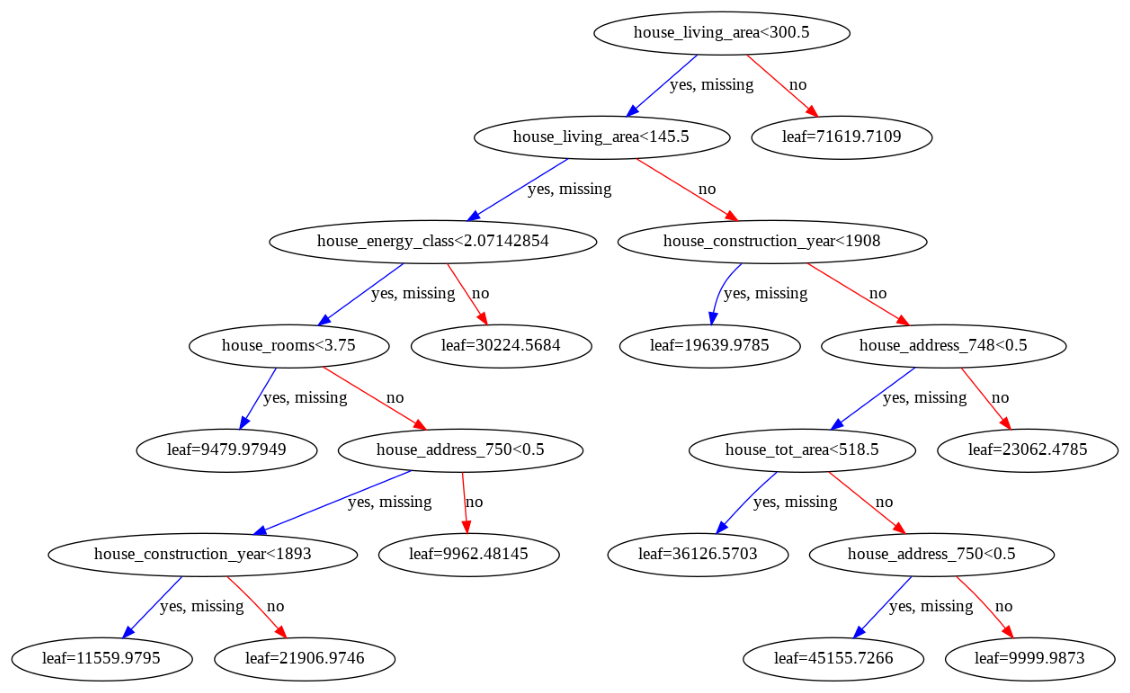

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))  # whatever size you want
xgb.plot_tree(xgb_model3,ax=ax)
plt.show()

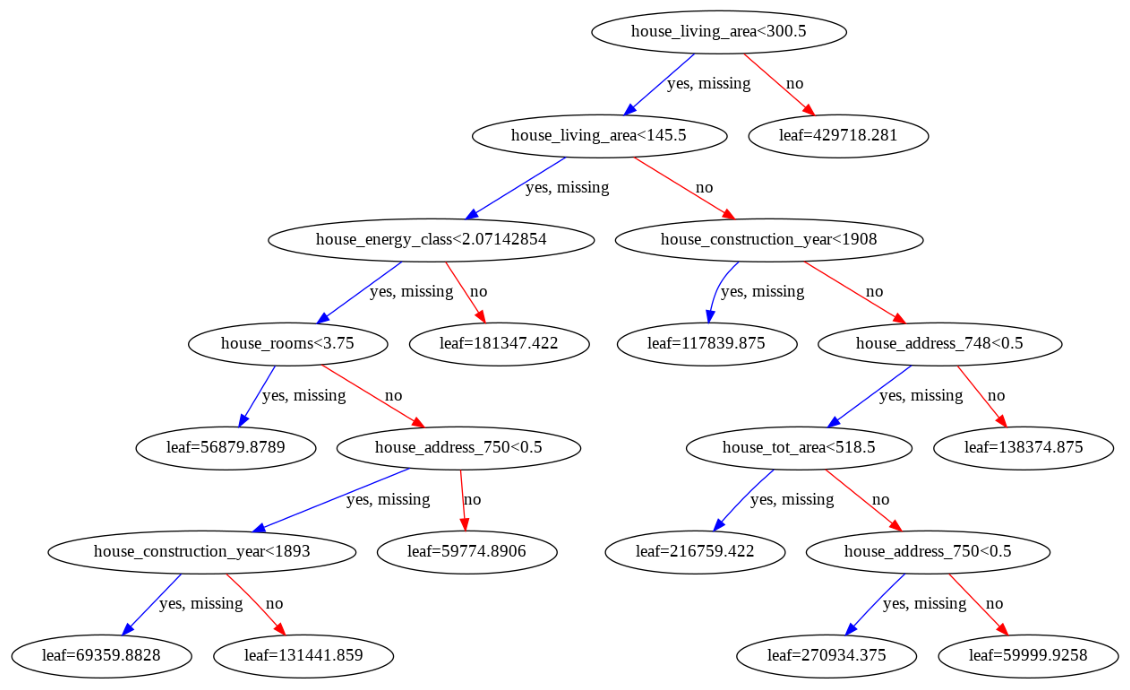

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))  # whatever size you want
xgb.plot_tree(xgb_model2,ax=ax)
plt.show()

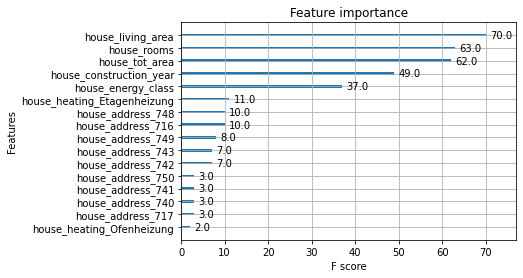

In [ ]:
xgb.plot_importance(xgb_model2)
plt.show()

# ElasticNetCV

In [ ]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=6, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)
               
cv_model.fit(X_train, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 99.10438207
Optimal l1_ratio: 1.000
Number of iterations 27


In [ ]:
y_train_pred = cv_model.predict(X_train)
y_pred = cv_model.predict(X_test)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE: %.4f' % train_rmse)
print('Test RMSE: %.4f' % test_rmse)

Train r2 score:  0.6194437004841129
Test r2 score:  0.8248095176089197
Train RMSE: 220645.9345
Test RMSE: 202995.9556


11 features, reduction of 0.00%


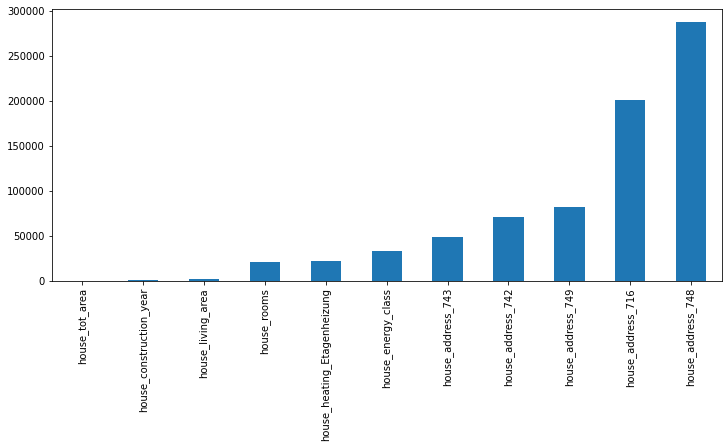

In [ ]:
feature_importance = pd.Series(index = X_train.columns, data = np.abs(cv_model.coef_))
n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (12,5));

## PCA

What is It, and When Do We Use It?
We use PCA when we want to reduce the number of variables (i.e. the number of dimensions) that encode our data. 

In [ ]:
from sklearn.decomposition import PCA

def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

#Decomposing the train set:
pca_train_results, pca_train = pca_dec(X_train, 2)

#Decomposing the test set:
pca_test_results, pca_test = pca_dec(X_test, 2)

#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(scree)

         Component  Explained Variance Ratio
0  PCA Component 1                      0.93
1  PCA Component 2                      0.06


In [ ]:
pca_train

PCA(n_components=2)

In [ ]:
#Sorting the values of the first principal component by how large each one is
df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(X_train.columns)})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

df2.head()

PCA           Variable Names
2  9.96e-01           house_tot_area
1  9.08e-02        house_living_area
3  1.30e-02  house_construction_year
0  2.62e-03              house_rooms
4  5.52e-04       house_energy_class

In [ ]:
#Creating Price Categories for TSNE and PCA Visualization!! We may want to use
#this in training classification models as well
def what_bracket(sale_price):
  if sale_price <=100000:
    return "Tier 1"
  elif sale_price <=200000:
    return "Tier 2"
  elif sale_price <=300000:
    return "Tier 3"
  elif sale_price <= 500000:
    return "Tier 4"
  else:
    return "Tier 5"

y_tiers = y_train.apply(what_bracket)

Text(0, 0.5, 'PCA Component 2')

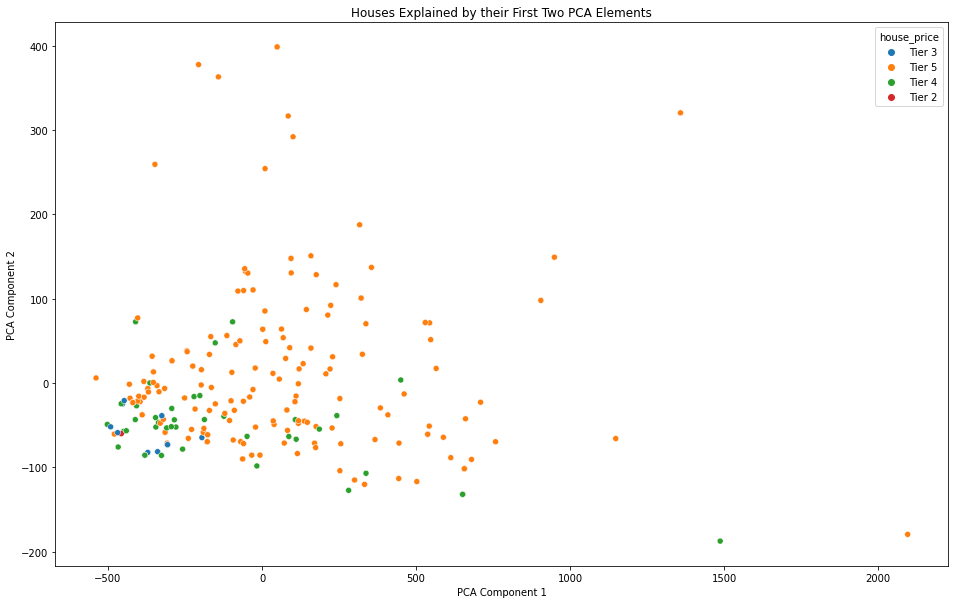

In [ ]:
#Plotting the first two PCA components, as well as the price tier of the house
#to see if PCA helps us distinguish price-points

import seaborn as sns
import matplotlib.pyplot as plt

first_comps = pca_train_results[:,0] #Taking the first PCA component for each
                                    #decomposed house's data

second_comps = pca_train_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_comps, y=second_comps,
    hue=y_tiers)

plt.title("Houses Explained by their First Two PCA Elements")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

While PCA is great for linearly separable data, TSNE promises to be a better decomposition technique that maps each point onto only two or three values in terms of separating non-linearly separable data.

In [ ]:
from sklearn.manifold import TSNE

#Decomposing the data with TSNE, onto 2 dimensions
tsne_train = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_train_results = tsne_train.fit_transform(X_train)

tsne_test = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_test_results = tsne_test.fit_transform(X_test)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.000s...
[t-SNE] Computed neighbors for 240 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 28.205035
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.223701
[t-SNE] KL divergence after 500 iterations: 0.220059
[t-SNE] Computing 60 nearest neighbors...
[t-SNE] Indexed 61 samples in 0.000s...
[t-SNE] Computed neighbors for 61 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 61 / 61
[t-SNE] Mean sigma: 265.986196
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.544991
[t-SNE] KL divergence after 500 iterations: 0.376663


In [ ]:
#Sorting the values of the first principal component by how large each one is
df = pd.DataFrame({'tsne':tsne_train.n_components, 'Variable Names':list(X_train.columns)})
df = df.sort_values('tsne', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['tsne']=df2['tsne'].apply(np.absolute)
df2 = df2.sort_values('tsne', ascending=False)
#print(df2['Variable Names'][0:11])

df2.head()

tsne           Variable Names
0     2              house_rooms
1     2        house_living_area
2     2           house_tot_area
3     2  house_construction_year
4     2       house_energy_class

Text(0, 0.5, 'TSNE Component 2')

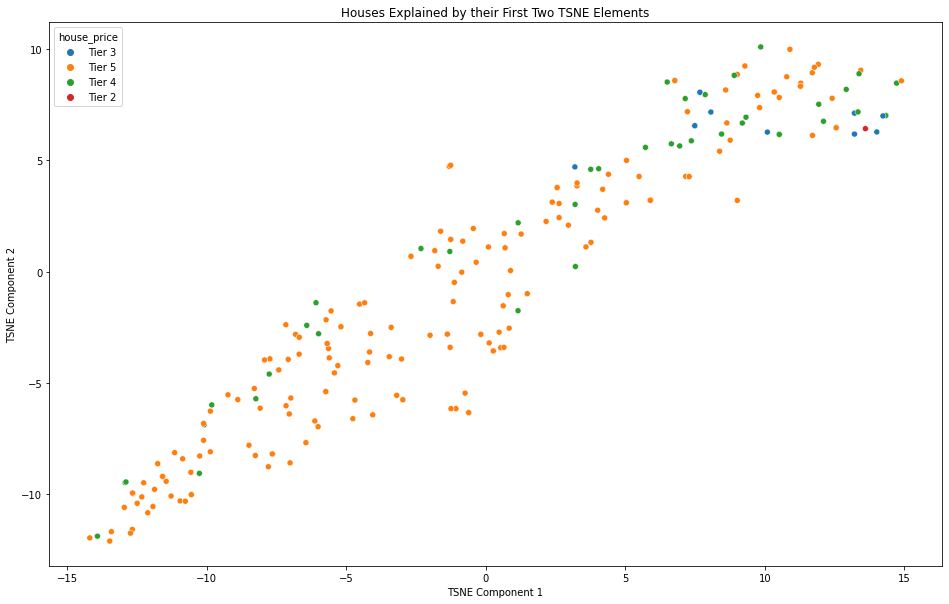

In [ ]:
#Plotting the first two TSNE components, as well as the price tier of the house
#to see if TSNE helps us distinguish price-points

import seaborn as sns
import matplotlib.pyplot as plt

first_comps = tsne_train_results[:,0] #Taking the first TSNE component for each
                                    #decomposed house's data

second_comps = tsne_train_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=first_comps, y=second_comps,
    hue=y_tiers)

plt.title("Houses Explained by their First Two TSNE Elements")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")

# PPS


In [ ]:
!pip install ppscore

     |████████████████████████████████| 47 kB 4.2 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13068 sha256=9e7c6c7240e05de3e8e89988719fda1b31b4c483d657e2cd01de7ab4dcf219a9
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore


In [ ]:
import ppscore as pps

In [ ]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    plt.figure(figsize = (14,14))
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

In [ ]:
heatmap(matrix)

In [ ]:
def corr_heatmap(df):
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title("Correlation matrix")
    return ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 799710.62 and sigma = 436063.85



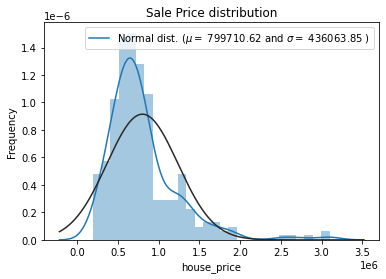

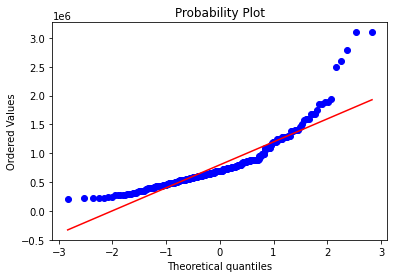

In [ ]:
sns.distplot(h_df['house_price'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(h_df['house_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sale Price distribution')
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(h_df['house_price'], plot=plt)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


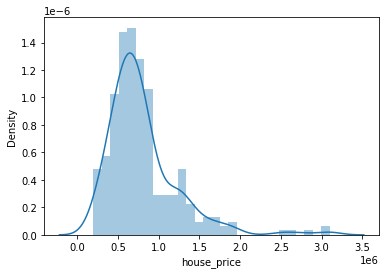

In [ ]:
sns.distplot(h_df['house_price']);

In [ ]:
h_df.head()

house_name  house_price  \
0  Schnuckelige Doppelhaushälfte mit Renovierungs...     199000.0   
1  Wohnschatz mit viel Platz! - FALC Immobilien H...     480000.0   
2   Neuwertiges Einfamilienhaus mit Einliegerwohnung     570000.0   
3  Heilbronn Mittelhaus ruhige Lage und sofort frei!     578000.0   
4  Ihre Wohlfühl-Doppelhaushälfte mit kleinem pfl...     649000.0   

   house_rooms  house_living_area  house_tot_area  house_construction_year  \
0          4.0              100.0            90.0                     1890   
1          9.0              168.0           177.0                     1906   
2          5.0              140.0           124.0                     1896   
3          5.0              142.0           138.0                     2000   
4          6.0              142.0           146.0                     2002   

   house_energy_class  house_address_715  house_address_716  \
0                1.14                  0                  0   
1                2.00                  0                  0   
2                2.00                  0                  0   
3                7.00                  0                  0   
4                5.00                  0                  0   

   house_address_717  ...  house_address_743  house_address_746  \
0                  0  ...                  0                  0   
1                  0  ...                  0                  0   
2                  0  ...                  0                  0   
3                  0  ...                  0                  0   
4                  0  ...                  0                  0   

   house_address_748  house_address_749  house_address_750  \
0                  0                  0                  0   
1                  0                  0                  0   
2                  0                  0                  0   
3                  0                  0                  0   
4                  0                  0                  0   

   house_heating_Etagenheizung  house_heating_Ofenheizung  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   house_heating_Zentralheizung  house_summary_year  house_price_m2  
0                             1                1880         1990.00  
1                             1                1900         2857.14  
2                             1                1880         4071.43  
3                             1                2000         4070.42  
4                             1                2000         4570.42  

[5 rows x 23 columns]

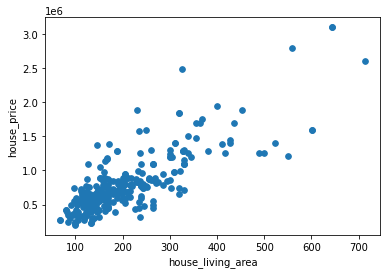

In [ ]:
data = pd.concat([h_df['house_price'], h_df['house_living_area']], axis=1)
data.plot.scatter(x='house_living_area', y='house_price',s=32);

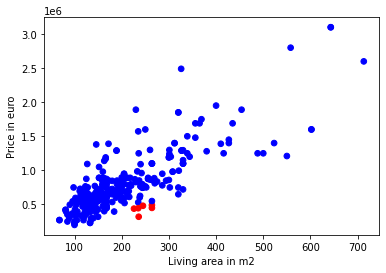

In [ ]:
data.plot.scatter(x='house_living_area', y='house_price', s=32,    
                c=np.where(np.logical_and(data['house_living_area']>200, data['house_price']<500000), 'red', 'blue'),                                        
                xlabel='Living area in m2', ylabel='Price in euro');

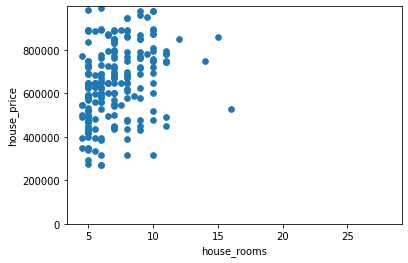

In [ ]:
data[data['house_rooms'] > 4].plot.scatter(x='house_rooms', y='house_price', ylim=(0,999999), s=32);

In [ ]:
data['house_price'].max()

3100000.0

In [ ]:
data['house_rooms'].max()

28.0

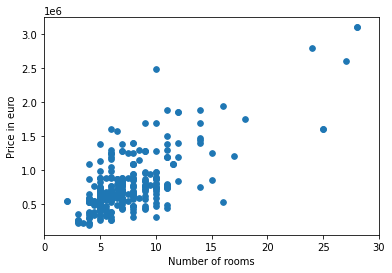

In [ ]:
data = pd.concat([h_df['house_price'], h_df['house_rooms']], axis=1)
data.plot.scatter(x='house_rooms', y='house_price',s=32, xlim=(0,30), xlabel='Number of rooms', ylabel='Price in euro');

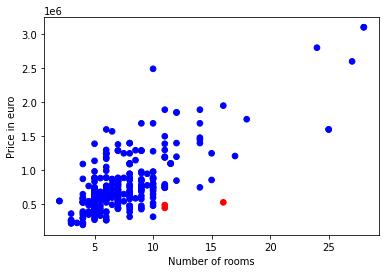

In [ ]:
#show prices in euro and plot a difference mark when house_rooms are more 10 and price less than 500000
data.plot.scatter(x='house_rooms', y='house_price', s=32,
                  c=np.where(np.logical_and(data['house_rooms']>10, data['house_price']<700000), 'red', 'blue'),
                  xlabel='Number of rooms', ylabel='Price in euro');


In [ ]:
corr_with_sale_price = h_df.corr()["house_price"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_sale_price.drop("house_price").plot.bar()
plt.show();

In [ ]:
df = h_df[['house_living_area', 'house_rooms', 'house_tot_area', 'house_energy_class','house_price','house_construction_year']]
sns.pairplot(df)
plt.show();

In [ ]:
sns.pairplot(df, hue="house_rooms", diag_kind="hist")
plt.show();

In [ ]:
sns.pairplot(df, hue="house_energy_class",diag_kind="hist")
plt.show();

# New Section

In [ ]:
features = h_df.drop('house_price',axis=1)
target = h_df['house_price']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
#visualize dec tree
#drop house_price_m2

#room_number analysis 4-5 olunca neler degesir

#also try it as target variable
#pycaret feautre importance
#eda pycaret


#Eventually show the customer decision tree
#not possible with small data points

#theoretical background for models
#show that yuo trained lot of models

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

In [ ]:
data = h_df.sample(frac=1.0, random_state=786)
data_unseen = h_df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (301, 23)
Unseen Data For Predictions (0, 23)


In [ ]:
data

house_name  house_price  \
0    1-Familienhaus mit Gartengrundstück in Sachsen...     595000.0   
1             NEU Dreifamilienhaus mit Blick ins Grüne    1190000.0   
2                           Viel Platz im eigenen Heim     775000.0   
3    Gehobenes Reihenendhaus mit Garten, Terrasse, ...     690000.0   
4    NEU Exklusives Einfamilienhaus mit Einliegerwo...    1149000.0   
..                                                 ...          ...   
296                    Das Anwesen für den Handwerker!     869000.0   
297  Wohnschatz mit viel Platz! - FALC Immobilien H...     449000.0   
298             WEITBLICK: Hör niemals auf zu träumen!     630000.0   
299  Freistehendes Zweifamilienhaus mit großzügigem...    1100000.0   
300  +Top saniertes Einfamilienhaus in Bietigheim+ ...     490000.0   

     house_rooms  house_living_area  house_tot_area  house_construction_year  \
0            5.0              130.0          1050.0                     1951   
1           11.0              300.0           744.0                     1963   
2            6.0              220.0           360.0                     1999   
3            6.0              200.0           245.0                     1980   
4            8.5              330.0           470.0                     1991   
..           ...                ...             ...                      ...   
296          9.0              228.0           657.0                     1963   
297          9.0              168.0           177.0                     1906   
298          5.5              160.0           452.0                     1972   
299          8.0              264.0           535.0                     1977   
300          4.5              103.0            97.0                     1921   

     house_energy_class  house_address_715  house_address_716  \
0              2.000000                  0                  0   
1              3.000000                  0                  1   
2              6.000000                  0                  0   
3              3.000000                  0                  0   
4              3.000000                  0                  1   
..                  ...                ...                ...   
296            1.000000                  0                  0   
297            2.000000                  0                  0   
298            2.395604                  0                  0   
299            3.000000                  0                  1   
300            2.142857                  0                  0   

     house_address_717  ...  house_address_743  house_address_746  \
0                    0  ...                  1                  0   
1                    0  ...                  0                  0   
2                    0  ...                  0                  0   
3                    0  ...                  0                  0   
4                    0  ...                  0                  0   
..                 ...  ...                ...                ...   
296                  0  ...                  0                  0   
297                  0  ...                  0                  0   
298                  0  ...                  1                  0   
299                  0  ...                  0                  0   
300                  0  ...                  1                  0   

     house_address_748  house_address_749  house_address_750  \
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
..                 ...                ...                ...   
296                  0                  0                  0   
297                  0                  0                  0   
298                  0                  0   

In [ ]:
(list(data))

['house_name',
 'house_price',
 'house_rooms',
 'house_living_area',
 'house_tot_area',
 'house_construction_year',
 'house_energy_class',
 'house_address_715',
 'house_address_716',
 'house_address_717',
 'house_address_740',
 'house_address_741',
 'house_address_742',
 'house_address_743',
 'house_address_746',
 'house_address_748',
 'house_address_749',
 'house_address_750',
 'house_heating_Etagenheizung',
 'house_heating_Ofenheizung',
 'house_heating_Zentralheizung',
 'house_summary_year',
 'house_price_m2']

In [ ]:
numeric = ['house_rooms',
 'house_living_area',
 'house_tot_area',
 'house_construction_year',
 'house_energy_class',
 'house_address_715',
 'house_address_716',
 'house_address_717',
 'house_address_740',
 'house_address_741',
 'house_address_742',
 'house_address_743',
 'house_address_746',
 'house_address_748',
 'house_address_749',
 'house_address_750',
 'house_heating_Etagenheizung',
 'house_heating_Ofenheizung',
 'house_heating_Zentralheizung',
 'house_summary_year']

In [ ]:
from pycaret.regression import *

exp_reg102 = setup(data = data,
                   target = 'house_price', 
                   session_id=123,
                   use_gpu = True,
                   imputation_type = "iterative",
                   #high_cardinality_features= ["house_energy_sources",  "house_heating"],
                   #categorical_features = ["house_address", 'house_energy_class'],
                   numeric_features = numeric,
                   normalize = True, transformation = True, transform_target = True, 
                   combine_rare_levels = True, rare_level_threshold = 0.05,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   ignore_features = ['house_name','house_price_m2'],
                   log_experiment = True, 
                   experiment_name = 'house price analysis',
                   feature_selection = True,
                   handle_unknown_categorical= True,) 

Description                            Value
0                               session_id                              123
1                                   Target                      house_price
2                            Original Data                        (301, 23)
3                           Missing Values                            False
4                         Numeric Features                               20
5                     Categorical Features                                0
6                         Ordinal Features                            False
7                High Cardinality Features                            False
8                  High Cardinality Method                             None
9                    Transformed Train Set                        (210, 19)
10                    Transformed Test Set                         (91, 19)
11                      Shuffle Train-Test                             True
12                     Stratify Train-Test                            False
13                          Fold Generator                            KFold
14                             Fold Number                               10
15                                CPU Jobs                               -1
16                                 Use GPU                             True
17                          Log Experiment                             True
18                         Experiment Name             house price analysis
19                                     USI                             7501
20                         Imputation Type                        iterative
21          Iterative Imputation Iteration                                5
22                         Numeric Imputer                             mean
23      Iterative Imputation Numeric Model  Light Gradient Boosting Machine
24                     Categorical Imputer                         constant
25  Iterative Imputation Categorical Model  Light Gradient Boosting Machine
26           Unknown Categoricals Handling                   least_frequent
27                               Normalize                             True
28                        Normalize Method                           zscore
29                          Transformation                             True
30                   Transformation Method                      yeo-johnson
31                                     PCA                            False
32                              PCA Method                             None
33                          PCA Components                             None
34                     Ignore Low Variance                            False
35                     Combine Rare Levels                             True
36                    Rare Level Threshold                             0.05
37                         Numeric Binning                            False
38                         Remove Outliers                            False
39                      Outliers Threshold                             None
40                Remove Multicollinearity                             True
41             Multicollinearity Threshold                             0.95
42             Remove Perfect Collinearity                             True
43                              Clustering                            False
44                    Clustering Iteration                             None
45                     Polynomial Features                            False
46                       Polynomial Degree                             None
47                    Trignometry Features                            False
48                    Polynomial Threshold                             None
49                          Group Features                            False
50                       Feature Selection                             True
51                Feature Selection Method                          classic
52 

In [ ]:
best = compare_models(turbo=False)

Model          MAE           MSE  \
catboost                 CatBoost Regressor  129440.8036  5.850120e+10   
mlp                           MLP Regressor  143650.5999  5.500845e+10   
rf                  Random Forest Regressor  145464.5980  6.296831e+10   
tr                       TheilSen Regressor  164063.8049  6.243041e+10   
br                           Bayesian Ridge  164150.3415  6.287046e+10   
et                    Extra Trees Regressor  132939.0744  6.287629e+10   
ridge                      Ridge Regression  165263.4578  6.253905e+10   
lightgbm    Light Gradient Boosting Machine  163410.4715  6.940752e+10   
kr                             Kernel Ridge  165564.7208  6.311812e+10   
ard       Automatic Relevance Determination  167797.0071  6.355714e+10   
lr                        Linear Regression  166236.9844  6.330314e+10   
huber                       Huber Regressor  165223.5896  6.668946e+10   
gbr             Gradient Boosting Regressor  149829.2835  6.315901e+10   
ada                      AdaBoost Regressor  169334.6446  7.555742e+10   
xgboost           Extreme Gradient Boosting  142511.4680  6.826578e+10   
svm               Support Vector Regression  174213.3215  8.779876e+10   
omp             Orthogonal Matching Pursuit  182683.9824  7.606515e+10   
ransac              Random Sample Consensus  177288.9844  7.914903e+10   
dt                  Decision Tree Regressor  163127.7657  9.245945e+10   
knn                   K Neighbors Regressor  209449.4686  1.041869e+11   
lar                  Least Angle Regression  184281.4070  8.154851e+10   
en                              Elastic Net  252259.3781  1.532408e+11   
lasso                      Lasso Regression  288352.1750  1.874450e+11   
llar           Lasso Least Angle Regression  288352.1072  1.874450e+11   
dummy                       Dummy Regressor  288352.1070  1.874450e+11   
par            Passive Aggressive Regressor  240185.4191  1.436008e+11   

                 RMSE      R2   RMSLE    MAPE  TT (Sec)  
catboost  210203.0448  0.7074  0.2276  0.1645     0.648  
mlp       215758.2147  0.6916  0.2510  0.1934     0.495  
rf        224276.9266  0.6533  0.2433  0.1821     0.338  
tr        229020.5841  0.6484  0.2567  0.2118     1.328  
br        230197.6016  0.6453  0.2521  0.2061     0.012  
et        225765.6387  0.6451  0.2485  0.1758     0.298  
ridge     230090.0641  0.6421  0.2524  0.2076     0.015  
lightgbm  235198.3621  0.6412  0.2582  0.2056     0.027  
kr        231108.1879  0.6396  0.2522  0.2077     0.022  
ard       231630.6633  0.6385  0.2539  0.2105     0.020  
lr        231392.5438  0.6377  0.2538  0.2089     0.010  
huber     236317.7398  0.6287  0.2563  0.2075     0.015  
gbr       231729.2886  0.6208  0.2484  0.1891     0.059  
ada       250129.0927  0.5896  0.2706  0.2103     0.083  
xgboost   239024.2711  0.5756  0.2451  0.1805     0.190  
svm       263571.8003  0.5679  0.2840  0.2212     0.013  
omp       257021.9186  0.5594  0.3086  0.2511     0.010  
ransac    261106.1547  0.5493  0.2863  0.2320     0.078  
dt        278432.4514  0.3970  0.3046  0.2047     0.011  
knn       305878.4009  0.3928  0.3352  0.2741     0.019  
lar       262434.6386  0.3697  0.2877  0.2278     0.013  
en        369693.3672  0.1356  0.4171  0.3418     0.010  
lasso     412772.4000 -0.0929  0.4774  0.4000     0.011  
llar      412772.4369 -0.0929  0.4774  0.4000     0.010  
dummy     412772.4367 -0.0929  0.4774  0.4000     0.007  
par       351613.7116 -0.1262  0.3632  0.2987     0.010

In [ ]:
# compare all baseline models and select top 5
top5 = compare_models(n_select = 5, turbo=False) 

Model          MAE           MSE  \
catboost                 CatBoost Regressor  128654.2033  5.926249e+10   
et                    Extra Trees Regressor  129105.4103  5.901315e+10   
mlp                           MLP Regressor  147995.0401  5.687880e+10   
rf                  Random Forest Regressor  146618.9419  6.352320e+10   
tr                       TheilSen Regressor  164067.5333  6.243029e+10   
br                           Bayesian Ridge  164150.3415  6.287046e+10   
ridge                      Ridge Regression  165263.3859  6.253905e+10   
lightgbm    Light Gradient Boosting Machine  163306.9045  6.940745e+10   
lr                        Linear Regression  165877.9820  6.280664e+10   
kr                             Kernel Ridge  165564.6890  6.311804e+10   
ard       Automatic Relevance Determination  167797.0071  6.355714e+10   
huber                       Huber Regressor  165223.5896  6.668946e+10   
gbr             Gradient Boosting Regressor  149274.8650  6.413845e+10   
xgboost           Extreme Gradient Boosting  142784.3773  6.826782e+10   
ada                      AdaBoost Regressor  170469.1632  7.889084e+10   
svm               Support Vector Regression  174213.3215  8.779876e+10   
omp             Orthogonal Matching Pursuit  182683.9824  7.606515e+10   
ransac              Random Sample Consensus  177590.0266  7.972353e+10   
dt                  Decision Tree Regressor  166007.4499  8.614236e+10   
knn                   K Neighbors Regressor  209449.4686  1.041869e+11   
lar                  Least Angle Regression  184685.0882  8.353584e+10   
en                              Elastic Net  252259.3781  1.532408e+11   
lasso                      Lasso Regression  288352.1750  1.874450e+11   
llar           Lasso Least Angle Regression  288352.1072  1.874450e+11   
dummy                       Dummy Regressor  288352.1070  1.874450e+11   
par            Passive Aggressive Regressor  240185.4191  1.436008e+11   

                 RMSE      R2   RMSLE    MAPE  TT (Sec)  
catboost  211554.3213  0.7049  0.2283  0.1628     0.568  
et        214721.7822  0.6869  0.2382  0.1681     0.297  
mlp       222070.4743  0.6638  0.2613  0.1999     0.548  
rf        225469.4996  0.6498  0.2434  0.1830     0.332  
tr        229021.5003  0.6484  0.2568  0.2119     1.393  
br        230197.6016  0.6453  0.2521  0.2061     0.011  
ridge     230090.0219  0.6421  0.2524  0.2076     0.016  
lightgbm  235144.0868  0.6413  0.2581  0.2055     0.178  
lr        230550.1125  0.6399  0.2530  0.2085     0.012  
kr        231108.1054  0.6396  0.2522  0.2077     0.020  
ard       231630.6633  0.6385  0.2539  0.2105     0.023  
huber     236317.7398  0.6287  0.2563  0.2075     0.014  
gbr       232753.1520  0.6202  0.2480  0.1882     0.060  
xgboost   238446.4344  0.5942  0.2441  0.1793     0.188  
ada       256489.3071  0.5680  0.2734  0.2110     0.083  
svm       263571.8003  0.5679  0.2840  0.2212     0.013  
omp       257021.9186  0.5594  0.3086  0.2511     0.009  
ransac    261523.5578  0.5483  0.2867  0.2321     0.107  
dt        271398.8289  0.4298  0.3038  0.2117     0.012  
knn       305878.4009  0.3928  0.3352  0.2741     0.020  
lar       264565.3091  0.3413  0.2870  0.2286     0.012  
en        369693.3672  0.1356  0.4171  0.3418     0.012  
lasso     412772.4000 -0.0929  0.4774  0.4000     0.012  
llar      412772.4369 -0.0929  0.4774  0.4000     0.014  
dummy     412772.4367 -0.0929  0.4774  0.4000     0.006  
par       351613.7116 -0.1262  0.3632  0.2987     0.012

In [ ]:
# tune top 5 base models
tuned_top5 = [tune_model(i,optimize="R2",search_library='optuna') for i in top5]

In [ ]:
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

In [ ]:
# blend top 5 base models 
blender = blend_models(estimator_list = top5) 

In [ ]:
# select best model 
best = automl(optimize = 'R2')

In [ ]:
print(best)

In [ ]:
catboost = create_model("catboost")

MAE           MSE         RMSE      R2   RMSLE    MAPE
0      86973.1667  1.533929e+10  123851.8745  0.8275  0.2091  0.1583
1     117091.2277  2.802864e+10  167417.5482  0.8571  0.1988  0.1584
2      72070.1555  1.212283e+10  110103.7335  0.9303  0.1271  0.0862
3     147140.2349  4.048775e+10  201215.6756  0.7927  0.2609  0.2221
4     100696.4356  2.662120e+10  163160.0366  0.6389  0.1887  0.1350
5     219396.5244  2.167974e+11  465615.0826  0.5162  0.2718  0.1688
6      93844.6237  1.446028e+10  120250.9176  0.7933  0.2009  0.1427
7     118181.4017  2.400590e+10  154938.3791  0.7642  0.2182  0.1650
8     213976.2969  1.743106e+11  417505.2197  0.2719  0.3316  0.1834
9     113299.4885  2.544908e+10  159527.6748  0.7613  0.2599  0.2141
Mean  128266.9555  5.776230e+10  208358.6142  0.7153  0.2267  0.1634
SD     48234.6539  6.997808e+10  119787.2514  0.1837  0.0534  0.0370

In [ ]:
xg = create_model("xgboost")

MAE           MSE         RMSE      R2   RMSLE    MAPE
0      83922.9609  1.316165e+10  114724.2109  0.8520  0.1944  0.1506
1     149052.4531  4.587445e+10  214183.2188  0.7661  0.2286  0.1885
2      93910.6953  2.719220e+10  164900.5938  0.8436  0.1688  0.1116
3     155380.6719  4.443435e+10  210794.5625  0.7725  0.2575  0.2200
4     120177.7656  5.868541e+10  242250.7188  0.2039  0.2534  0.1719
5     255482.8594  1.706949e+11  413152.3438  0.6191  0.2994  0.2419
6     124921.4297  6.662759e+10  258123.2031  0.0474  0.2266  0.1667
7     113868.2969  2.826144e+10  168111.3906  0.7224  0.1942  0.1432
8     225620.8594  2.047813e+11  452527.6250  0.1446  0.3593  0.1953
9     102776.6875  2.294463e+10  151474.8438  0.7848  0.2687  0.2153
Mean  142511.4680  6.826578e+10  239024.2711  0.5756  0.2451  0.1805
SD     53740.3416  6.218507e+10  105513.8875  0.2989  0.0533  0.0376

In [ ]:
create_app(xg)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://29559.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f58effc3990>,
 'http://127.0.0.1:7865/',
 'https://29559.gradio.app')

In [ ]:
tuned_model, tuner = tune_model(xg,
                         n_iter=50,
                         optimize='R2',
                         search_library='optuna',
                         search_algorithm='tpe',
                         early_stopping='asha',
                         choose_better=False,
                         verbose=True,
                         tuner_verbose=4,
                         return_tuner=True
                        )

MAE           MSE         RMSE      R2   RMSLE    MAPE
0      26475.5332  9.910177e+08   31480.4336  0.9889  0.0552  0.0443
1      50534.8828  8.317852e+09   91202.2578  0.9576  0.0706  0.0536
2      28177.8398  1.273543e+09   35686.7383  0.9927  0.0452  0.0353
3      59537.2383  7.712488e+09   87820.7734  0.9605  0.0758  0.0630
4      34567.3750  1.741175e+09   41727.3945  0.9764  0.0544  0.0485
5     126410.5859  1.003860e+11  316837.5625  0.7760  0.1499  0.0782
6      31698.2500  1.914155e+09   43751.0547  0.9726  0.0516  0.0397
7      46898.6953  3.362960e+09   57991.0312  0.9670  0.0717  0.0572
8      85971.5469  3.443196e+10  185558.5156  0.8562  0.1211  0.0685
9      41230.8281  3.491267e+09   59086.9453  0.9673  0.0981  0.0697
Mean   53150.2775  1.636225e+10   95114.2707  0.9415  0.0793  0.0558
SD     29688.0043  2.957559e+10   85530.8231  0.0661  0.0322  0.0134

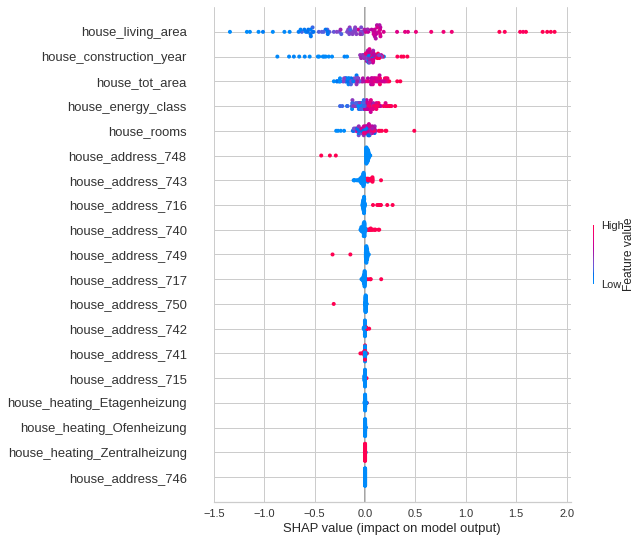

In [ ]:
interpret_model(xg)

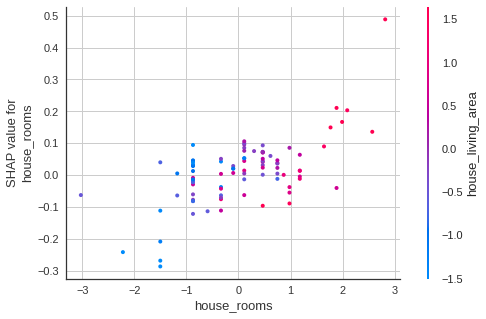

In [ ]:
interpret_model(xg,plot = 'correlation', feature='house_rooms')

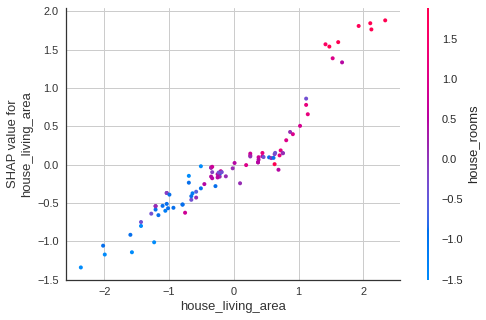

In [ ]:
interpret_model(xg,plot = 'correlation', feature='house_living_area')

In [ ]:
interpret_model(tuned_model, plot = 'correlation', feature='house_rooms')

In [ ]:
interpret_model(tuned_model, plot = 'reason')

ValueError: ignored

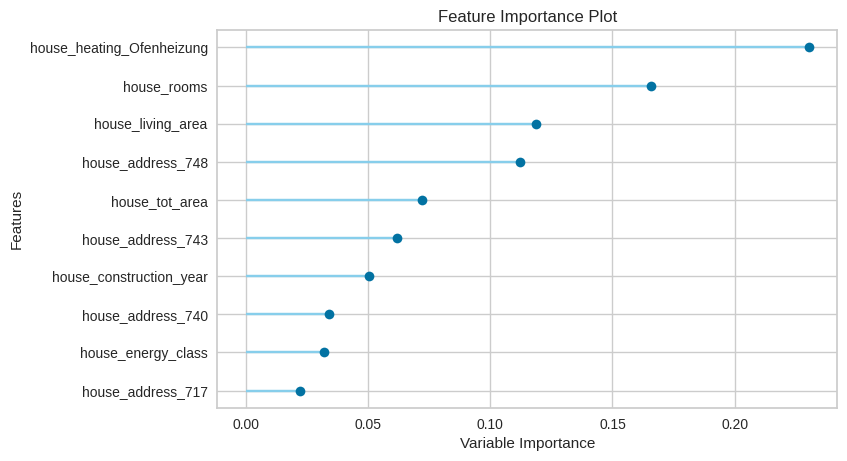

In [ ]:
plot_model(tuned_model, plot='feature')

In [ ]:
plot_model(xg, plot='residuals_interactive')

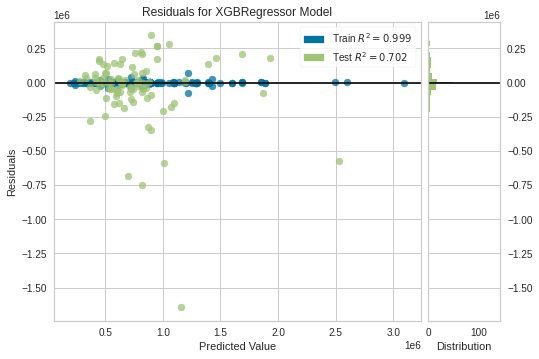

In [ ]:
plot_model(tuned_model, plot='residuals')

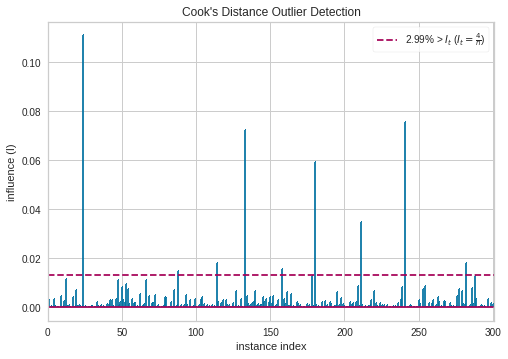

In [ ]:
plot_model(tuned_model, plot='cooks')

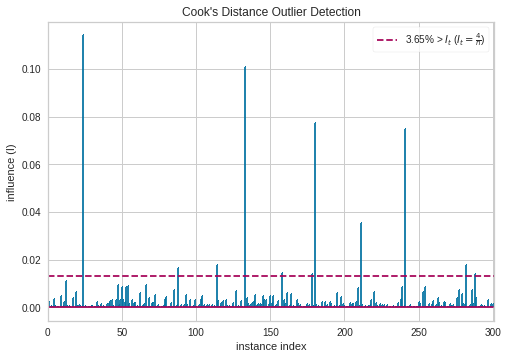

In [ ]:
plot_model(xg, plot='cooks')

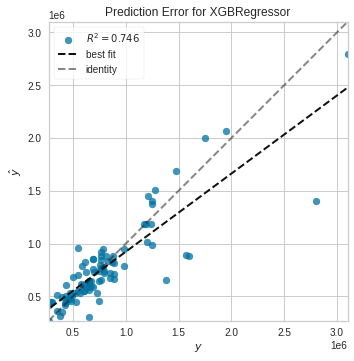

In [ ]:
plot_model(xg, plot='error')

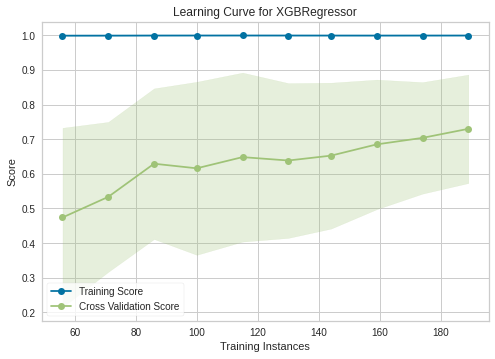

In [ ]:
plot_model(tuned_model, plot='learning')

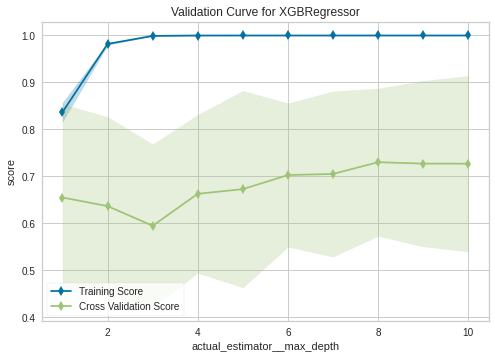

In [ ]:
plot_model(tuned_model, plot='vc')

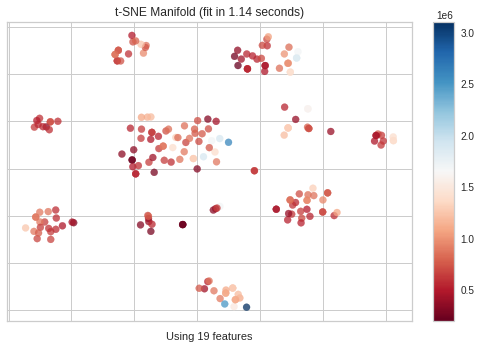

In [ ]:
plot_model(tuned_model, plot='manifold')

In [ ]:
lightgbm = create_model('lightgbm')

MAE           MSE         RMSE      R2   RMSLE    MAPE
0     116382.3776  2.228323e+10  149275.6683  0.7494  0.2568  0.2201
1     195269.8928  6.658923e+10  258048.8950  0.6605  0.2654  0.2391
2     114006.6775  2.446010e+10  156397.2352  0.8593  0.1888  0.1496
3     153736.9150  4.034945e+10  200871.7240  0.7934  0.2528  0.2189
4     122740.5460  2.860894e+10  169141.7611  0.6119  0.2045  0.1681
5     273270.6235  2.125223e+11  461001.3588  0.5257  0.3246  0.2572
6     118871.6117  1.975441e+10  140550.3947  0.7176  0.2176  0.1694
7     156174.9139  3.685402e+10  191974.0129  0.6380  0.2581  0.2003
8     256099.9958  2.178798e+11  466775.9287  0.0899  0.3782  0.2207
9     126713.4414  2.479811e+10  157474.1651  0.7674  0.2342  0.2119
Mean  163326.6995  6.940995e+10  235151.1144  0.6413  0.2581  0.2055
SD     56087.6865  7.402621e+10  118801.9527  0.2056  0.0537  0.0322

In [ ]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'R2')

MAE           MSE         RMSE      R2   RMSLE    MAPE
0     138266.3729  4.316781e+10  207768.6515  0.5146  0.2735  0.2343
1     152311.1066  4.262959e+10  206469.3541  0.7826  0.2191  0.1909
2     108474.3341  2.849689e+10  168810.2062  0.8360  0.1850  0.1264
3     167562.1142  4.858372e+10  220417.1507  0.7512  0.2524  0.2251
4     135453.0730  3.704405e+10  192468.3204  0.4975  0.2428  0.2006
5     271093.2687  2.072373e+11  455233.2172  0.5375  0.3159  0.2551
6     102116.6733  1.965119e+10  140182.7104  0.7190  0.1775  0.1324
7     156073.1816  3.799838e+10  194931.7273  0.6267  0.2449  0.1929
8     280137.7334  2.271349e+11  476586.6889  0.0512  0.4112  0.2447
9     127658.1124  2.603026e+10  161338.9582  0.7559  0.2528  0.2234
Mean  163914.5970  7.179741e+10  242420.6985  0.6072  0.2575  0.2026
SD     59058.9086  7.329525e+10  114147.3174  0.2176  0.0639  0.0418

In [ ]:
interpret_model(tuned_lightgbm, plot = 'reason', observation = 12)

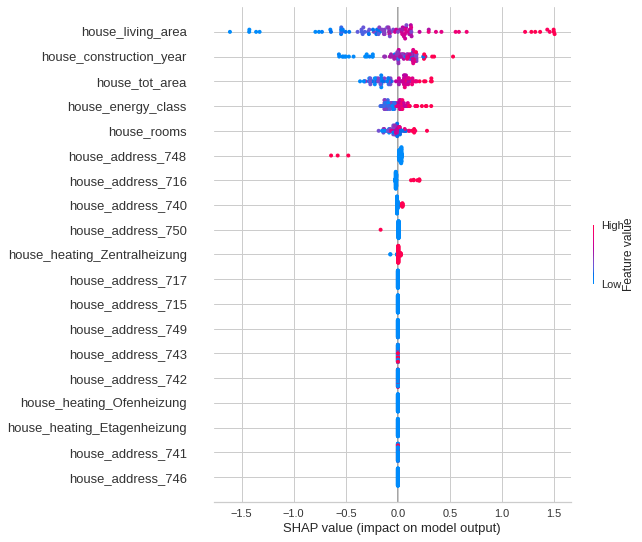

In [ ]:
interpret_model(tuned_lightgbm)

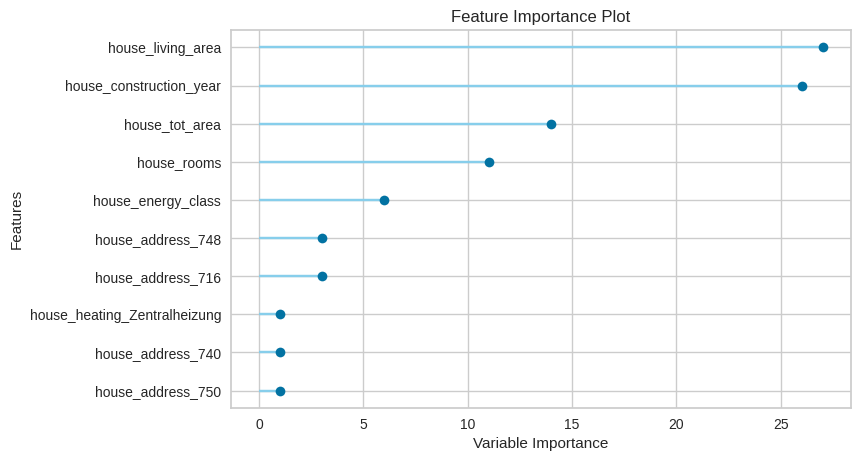

In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

In [ ]:
rf = create_model('rf')
#Mean	166438.9753	9.022853e+10	275917.9565	0.4124	0.3164	0.2112

MAE           MSE         RMSE      R2   RMSLE    MAPE
0     116938.2463  2.642956e+10  162571.7080  0.7028  0.2485  0.2126
1     136324.8066  3.468941e+10  186250.9304  0.8231  0.2256  0.1863
2      92277.2820  1.795864e+10  134009.8382  0.8967  0.1304  0.1001
3     161533.9155  4.103175e+10  202562.9621  0.7899  0.2618  0.2290
4     130580.9916  4.564622e+10  213649.7703  0.3808  0.2391  0.1703
5     247139.8421  1.919996e+11  438177.5714  0.5715  0.2819  0.2167
6     106501.4281  2.167318e+10  147218.1300  0.6901  0.2166  0.1515
7     118946.0290  2.151946e+10  146695.1153  0.7886  0.1896  0.1493
8     232940.1070  2.050206e+11  452792.0188  0.1436  0.3715  0.1902
9     121924.1575  2.693354e+10  164114.4118  0.7474  0.2751  0.2303
Mean  146510.6806  6.329020e+10  224804.2456  0.6535  0.2440  0.1836
SD     49960.3006  6.818402e+10  112930.2735  0.2187  0.0600  0.0395

In [ ]:
rf_tuned = tune_model(rf,n_iter = 100, optimize='R2')

MAE           MSE         RMSE      R2   RMSLE    MAPE
0     112533.3274  2.252605e+10  150086.8124  0.7467  0.2476  0.2131
1     149021.5865  4.213546e+10  205269.2281  0.7852  0.2307  0.1949
2     109255.6976  2.879105e+10  169679.2706  0.8344  0.1480  0.1198
3     171972.9039  5.961734e+10  244166.6276  0.6947  0.2969  0.2466
4     122172.0123  3.281703e+10  181154.7071  0.5548  0.2086  0.1658
5     262223.2402  2.365057e+11  486318.5283  0.4722  0.3205  0.2307
6      86386.0672  1.164374e+10  107906.1650  0.8335  0.1722  0.1274
7     140612.4869  2.933101e+10  171262.9964  0.7119  0.2162  0.1706
8     253738.7159  2.101003e+11  458367.0112  0.1224  0.3670  0.2141
9     123248.5611  2.275546e+10  150849.1308  0.7866  0.2614  0.2342
Mean  153116.4599  6.962232e+10  232506.0477  0.6542  0.2469  0.1917
SD     56948.3655  7.801349e+10  124752.7764  0.2094  0.0637  0.0421